<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Copy_of_Anomaly_based_Network_Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection based Network Intrusion Detection System**


### 1. Mount drive to download Datasets 
Make sure your google drive has atleast 1GB of free space



In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 2. Download and unzip datasets (need to be done only once)



Make directory `IDS_Dataset` in your drive and make it the pwd(present working directory)

In [2]:
%cd /content/gdrive/My\ Drive
%mkdir IDS_Dataset
%cd IDS_Dataset/

/content/gdrive/My Drive
/content/gdrive/My Drive/IDS_Dataset


In [3]:
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/kddcup.data.zip
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/kddcup.data_10_percent.zip
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/kddcup.newtestdata_10_percent_unlabeled.zip
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/kddcup.testdata.unlabeled.zip
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/corrected.zip
!wget --no-check-certificate http://kdd.org/cupfiles/KDDCupData/1999/kddcup.testdata.unlabeled_10_percent.zip


--2023-04-10 06:41:07--  http://kdd.org/cupfiles/KDDCupData/1999/kddcup.data.zip
Resolving kdd.org (kdd.org)... 190.92.158.4
Connecting to kdd.org (kdd.org)|190.92.158.4|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://kdd.org/cupfiles/KDDCupData/1999/kddcup.data.zip [following]
--2023-04-10 06:41:07--  https://kdd.org/cupfiles/KDDCupData/1999/kddcup.data.zip
Connecting to kdd.org (kdd.org)|190.92.158.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18119640 (17M) [application/zip]
Saving to: ‘kddcup.data.zip’

kddcup.data.zip     100%[===================>]  17.28M  38.2MB/s    in 0.5s    

2023-04-10 06:41:07 (38.2 MB/s) - ‘kddcup.data.zip’ saved [18119640/18119640]

URL transformed to HTTPS due to an HSTS policy
--2023-04-10 06:41:08--  https://kdd.org/cupfiles/KDDCupData/1999/kddcup.data_10_percent.zip
Resolving kdd.org (kdd.org)... 190.92.158.4
Connecting to kdd.org (kdd.org)|190.92.158.4|:443... connected.

In [4]:
!unzip kddcup.data.zip -d data
!unzip kddcup.data_10_percent.zip -d data
!unzip kddcup.newtestdata_10_percent_unlabeled.zip -d data
!unzip kddcup.testdata.unlabeled.zip -d data
!unzip corrected.zip -d data
!unzip kddcup.testdata.unlabeled_10_percent.zip -d data

Archive:  kddcup.data.zip
  inflating: data/kddcup.data.txt    
Archive:  kddcup.data_10_percent.zip
  inflating: data/kddcup.data_10_percent.txt  
Archive:  kddcup.newtestdata_10_percent_unlabeled.zip
  inflating: data/kddcup.newtestdata_10_percent_unlabeled.txt  
Archive:  kddcup.testdata.unlabeled.zip
  inflating: data/kddcup.testdata.unlabeled.txt  
Archive:  corrected.zip
  inflating: data/corrected          
Archive:  kddcup.testdata.unlabeled_10_percent.zip
  inflating: data/kddcup.testdata.unlabeled_10_percent.txt  


### 3. Reading Datasets

In [5]:
import pandas as pd

dataset_head = ['duration','protocol_type','service','src_bytes','dst_bytes','flag','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','serror_rate',
'rerror_rate','same_srv_rate','diff_srv_rate','srv_count','srv_serror_rate','srv_rerror_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']

train = pd.read_csv (r'/content/gdrive/My Drive/IDS_Dataset/data/kddcup.data.txt', header = None, nrows=4817099)
test = pd.read_csv (r'/content/gdrive/My Drive/IDS_Dataset/data/kddcup.data_10_percent.txt', header = None, nrows=485797)

train.columns = dataset_head
test.columns = dataset_head

print(train.head())
print(test.tail())

   duration protocol_type service src_bytes  dst_bytes   flag  land  \
0         0           tcp    http        SF        215  45076     0   
1         0           tcp    http        SF        162   4528     0   
2         0           tcp    http        SF        236   1228     0   
3         0           tcp    http        SF        233   2032     0   
4         0           tcp    http        SF        239    486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3     

### 4. Preprocessing
Prepocessing of dataset is important to get the dataset in desired format. It also includes converting non-number values to numbers using Label Encoding

P.S. Here we can use two types of methods, Simple Label Encoding & One Hot Encoder. Implementation of both has been done, you can try either one

 **Label Encoder**

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in train.columns:
    if train[column].dtype == type(object):
        train[column] = le.fit_transform(train[column])

for column in test.columns:
    if test[column].dtype == type(object):
        test[column] = le.fit_transform(test[column])

 **One Hot Encoder**

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for column in train.columns:
    if train[column].dtype == type(object):
        train[column] = ohe.fit_transform(train[column])

for column in test.columns:
    if test[column].dtype == type(object):
        test[column] = ohe.fit_transform(test[column])

**Split Train & Test dataset into X and Y**

In [8]:
#Since last column is the labels, we are separating them as X and Y, 
# X are the features and Y is the assigned labels of threat

trainX = train.iloc[:,:41]
trainY = train.iloc[:,-1]

testX = test.iloc[:,:41]
testY = test.iloc[:,-1]

### 5. Models

**Random Forest Classifier**

Random Forest Classifier is an ensemble tree-based learning algorithm. It is a set of decision trees from randomly selected subset of training set. It aggregates the output from different decision trees to decide the final output result.


* Training the model

In [9]:
from sklearn.ensemble import RandomForestClassifier
#Create a RandomForest Classifier
RFclf = RandomForestClassifier(n_estimators=100, n_jobs=-1)  # n_estimators refers to the number of trees in the forest
#You can increase the n_estimators for better accuracy, training time will be increased tho

#Train the model using the training dataset
RFclf.fit(trainX,trainY) 

KeyboardInterrupt: ignored

* Predicting the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

predrf = RFclf.predict(testX) #Predicting on the test dataset
print(accuracy_score(predrf, testY))

0.9987505068989722


**Logistic Regression**

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.

* Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
#Create a Logistic Regression 
lrclf = LogisticRegression(solver='sag', n_jobs=-1, verbose=1, max_iter=50)  # C is the regularization parameter

#Train the model using the training dataset
lrclf.fit(testX,testY) 


[Parallel(n_jobs=250)]: Using backend ThreadingBackend with 250 concurrent workers.


max_iter reached after 282 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 283 seconds
max_iter reached after 285 seconds
max_iter reached after 285 seconds


[Parallel(n_jobs=250)]: Done   4 out of  23 | elapsed:  4.8min remaining: 22.6min


max_iter reached after 286 seconds
max_iter reached after 286 seconds
max_iter reached after 286 seconds
max_iter reached after 286 seconds
max_iter reached after 286 seconds
max_iter reached after 287 seconds
max_iter reached after 287 seconds
max_iter reached after 287 seconds
max_iter reached after 287 seconds
max_iter reached after 287 seconds
max_iter reached after 287 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 288 seconds
max_iter reached after 289 seconds


[Parallel(n_jobs=250)]: Done  23 out of  23 | elapsed:  4.8min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='ovr', n_jobs=250, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=1,
                   warm_start=False)

* Predicting the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

predLr = clf.predict(testX) #Predicting on the test dataset
print(accuracy_score(predLr, testY))

0.7021863041558511


**Gaussian Naive Bayes Classifier**

Gaussian Naïve Bayes classifier assumes that the data from each label is drawn from a simple Gaussian distribution.

* Training the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

#Train the model on test data
gnb.fit(trainX,trainY)


GaussianNB(priors=None, var_smoothing=1e-09)


* Predicting the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

prednb = gnb.predict(testX)
print(accuracy_score(prednb, testY))

0.9428094450974378


**MLP (Multilayer Perceptron)**

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). 

* Training the model

In [ ]:
from sklearn.neural_network import MLPClassifier
#Create a Multi-Layer Perceptron
mlpclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
hidden_layer_sizes=(5, 3), random_state=1)
mlpclf.fit(trainX,trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)



* Predicting the accuracy


In [ ]:
from sklearn.metrics import accuracy_score
predmlp=mlpclf.predict(testX)
print(accuracy_score(predmlp, testY))

0.0007595765309378197


**Decision Tree Classifier**

The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

# Training
print ("Training model..........")
dtclf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None)

trained_model = dtclf.fit(trainX,trainY)

print ("Score: ", trained_model.score(trainX, trainY))

# Predicting
print ("Predicting")
y_pred = dtclf.predict(testX)

print ("Computing performance metrics")

print ("Error: ", zero_one_loss(testY, y_pred))
print("Accuracy: ", accuracy_score(y_pred, testY))

Training model
Score:  0.9999958481235283
Predicting
Computing performance metrics
Error:  0.011138397314104487
Accuracy:  0.9888616026858955


**KNN (K-Nearest Neighbour) Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

print("Training..........")
KNNclf = KNeighborsClassifier(1, n_jobs=-1)
KNNclf.fit(trainX, trainY)
# Predicting
predknn = KNNclf.predict(testX)

print ("Computing performance metrics")

print ("Error: ", zero_one_loss(testY, predknn))
print("Accuracy: ", accuracy_score(testY, predknn))


Training..........


### **Deep Neural Networks**

A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers. The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship.

> Note : We are evaluating neural networks with several different hidden layers configuration. Current epochs has been set to 50, one can change it accordingly.




In [10]:
%cd /content
!rm -rf 'anomaly-detection-system'
!git clone https://github.com/piyush-palta/anomaly-detection-system

/content
Cloning into 'anomaly-detection-system'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (12/12), 3.49 MiB | 2.89 MiB/s, done.


In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn import metrics
from sklearn.preprocessing import Normalizer

np.random.seed(1337)  # for reproducibility

traindata = pd.read_csv('/content/anomaly-detection-system/dataset/training.csv', header=None)
testdata = pd.read_csv('/content/anomaly-detection-system/dataset/testing.csv', header=None)


X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

trainX = np.array(X)
testT = np.array(T)

trainX.astype(float)
testT.astype(float)

scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

y_train = np.array(Y)
y_test = np.array(C)

X_train = np.array(trainX)
X_test = np.array(testT)

batch_size = 64

**Deep Neural Networks with 1 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 46s 6ms/step - loss: 0.0241 - accuracy: 0.9911 - val_loss: 0.4954 - val_accuracy: 0.9215
Epoch 2/5
7720/7720 [==============================] - 38s 5ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.6154 - val_accuracy: 0.9215
Epoch 3/5
7720/7720 [==============================] - 40s 5ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.6853 - val_accuracy: 0.9208
Epoch 4/5
7720/7720 [==============================] - 41s 5ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.6821 - val_accuracy: 0.9217
Epoch 5/5
7720/7720 [==============================] - 43s 6ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.5945 - val_accuracy: 0.9219


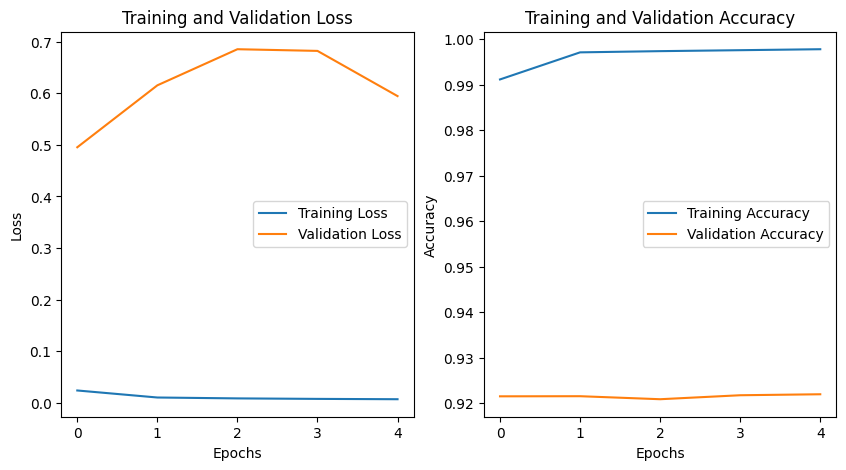

In [15]:
import matplotlib.pyplot as plt

# 1. define the network
model = Sequential()
model.add(Dense(512,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn1.hdf5")

# 2. plot the training and validation loss and accuracy
plt.figure(figsize=(10, 5))

# plot the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Deep Neural Networks with 2 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 49s 6ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.6236 - val_accuracy: 0.9243
Epoch 2/5
7720/7720 [==============================] - 38s 5ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.8622 - val_accuracy: 0.9225
Epoch 3/5
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.9343 - val_accuracy: 0.9215
Epoch 4/5
7720/7720 [==============================] - 38s 5ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.9320 - val_accuracy: 0.9254
Epoch 5/5
7720/7720 [==============================] - 38s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.7170 - val_accuracy: 0.9235


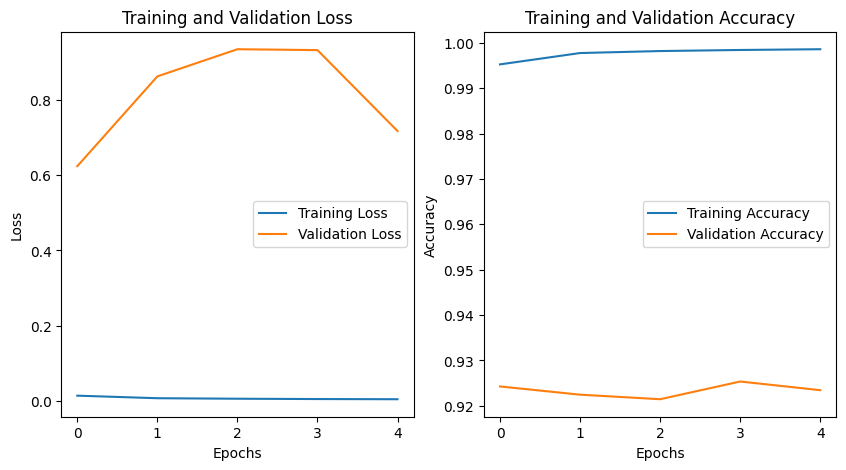

In [17]:
import matplotlib.pyplot as plt

# define the network
model = Sequential()
model.add(Dense(512,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn2.hdf5")

# 2. plot the training and validation loss and accuracy
plt.figure(figsize=(10, 5))

# plot the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Deep Neural Networks with 3 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 43s 5ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.8083 - val_accuracy: 0.9250
Epoch 2/5
7720/7720 [==============================] - 40s 5ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.7755 - val_accuracy: 0.9219
Epoch 3/5
7720/7720 [==============================] - 40s 5ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 1.0909 - val_accuracy: 0.9235
Epoch 4/5
7720/7720 [==============================] - 40s 5ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 1.2191 - val_accuracy: 0.9249
Epoch 5/5
7720/7720 [==============================] - 41s 5ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.6963 - val_accuracy: 0.9246


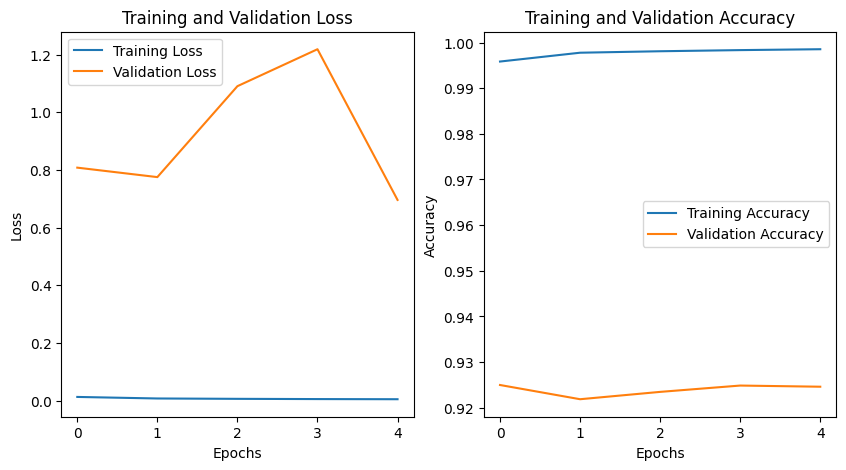

In [18]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn3.hdf5")

# 2. plot the training and validation loss and accuracy
plt.figure(figsize=(10, 5))

# plot the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Deep Neural Networks with 4 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 102s 5ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.6581 - val_accuracy: 0.9247
Epoch 2/5
7720/7720 [==============================] - 42s 5ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.7973 - val_accuracy: 0.9261
Epoch 3/5
7720/7720 [==============================] - 43s 6ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 1.0730 - val_accuracy: 0.9235
Epoch 4/5
7720/7720 [==============================] - 44s 6ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.7951 - val_accuracy: 0.9228
Epoch 5/5
7720/7720 [==============================] - 42s 5ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 1.5995 - val_accuracy: 0.9243


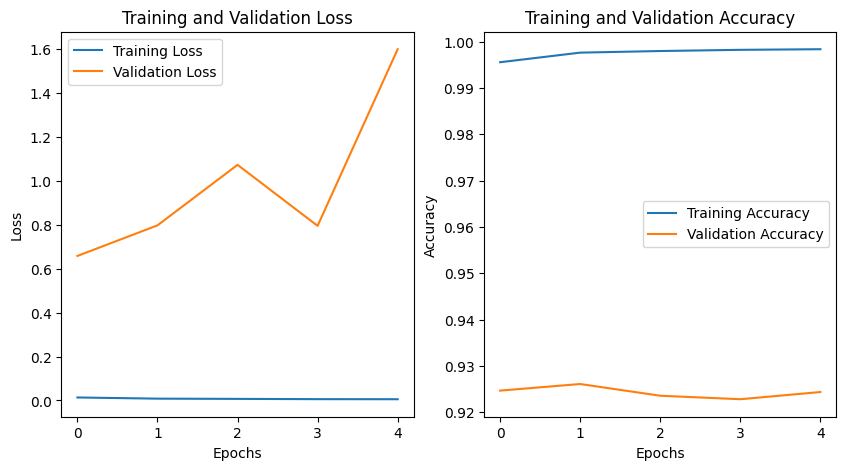

In [20]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn4.hdf5")

# 2. plot the training and validation loss and accuracy
plt.figure(figsize=(10, 5))

# plot the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Deep Neural Networks with 5 Hidden Layer**


Epoch 1/5
7720/7720 [==============================] - 47s 6ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.6143 - val_accuracy: 0.9247
Epoch 2/5
7720/7720 [==============================] - 46s 6ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.7618 - val_accuracy: 0.9235
Epoch 3/5
7720/7720 [==============================] - 45s 6ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.9454 - val_accuracy: 0.9259
Epoch 4/5
7720/7720 [==============================] - 47s 6ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.6892 - val_accuracy: 0.9248
Epoch 5/5
7720/7720 [==============================] - 45s 6ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 1.1003 - val_accuracy: 0.9266


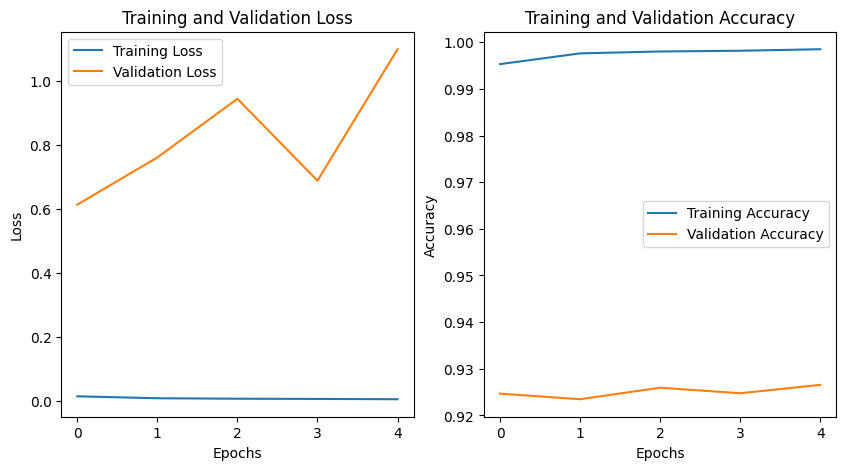

In [21]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5)
model.save("model_nn5.hdf5")

# 2. plot the training and validation loss and accuracy
plt.figure(figsize=(10, 5))

# plot the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
